In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

https://stackoverflow.com/questions/55428016/trouble-with-multiple-sankey-subplots-in-plotly

In [2]:
nodes_fossil = pd.read_excel("nodes_fossil.xlsx")
nodes_food = pd.read_excel("nodes_food.xlsx")
links_fossil = pd.read_excel("links_fossil.xlsx")
links_food = pd.read_excel("links_food.xlsx")

In [33]:
nodes_fossil["name_show"] = nodes_fossil["name_show"].str.replace("Constituency -","NGO").replace("United Kingdom of Great Britain and Northern Ireland","United Kingdom")
nodes_fossil["name_show"] = nodes_fossil["name_show"].str.replace("NGO Research and independent","RINGO").replace('NGO Business and Industry',"BINGO")
nodes_food["name_show"] = nodes_food["name_show"].str.replace("Constituency -","NGO").replace('NGO Business and Industry',"BINGO")

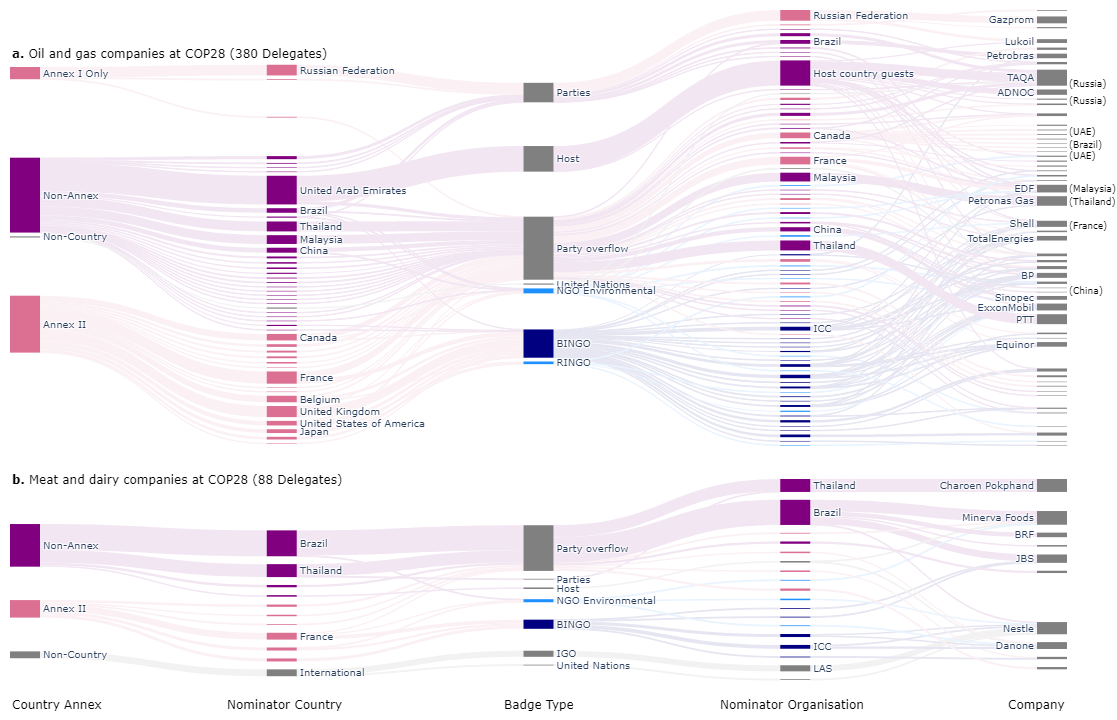

In [37]:
#### Create first subplot
trace1 = go.Sankey(
    node=dict(
        pad=20,
        thickness=30,
        line=dict(color="black", width=0),
        label=nodes_fossil["name_show"],
        color=nodes_fossil["color"]
    ),
    link=dict(
        source=links_fossil["source_index"],
        target=links_fossil["target_index"],
        value=links_fossil["count"],
        color=links_fossil["color"]
    ),
    domain={
        'y': [0.35, 1]
    })

# Create second subplot
trace2 = go.Sankey(
    node=dict(
        pad=20,
        thickness=30,
        line=dict(color="black", width=0),
        label=nodes_food["name_show"],
        color=nodes_food["color"]
    ),
    link=dict(
        source=links_food["source_index"],
        target=links_food["target_index"],
        value=links_food["count"],
        color=links_food["color"]
    ),
    domain={
        'y': [0, 0.3]
    })

data = [trace1,trace2]

layout =  go.Layout(
    #title = ["Basic Sankey Diagram","Blah"],
    height=720, width=680,
    font = dict(size = 10),
    margin=dict(l=10, r=50, t=10, b=40)
)

fig = go.Figure(data=data, layout=layout)

fig.add_annotation(dict(font=dict(color='black',size=12),x=0,y=0.285,showarrow=False,
                        text="<b>b.</b> Meat and dairy companies at COP28 (88 Delegates)",textangle=0,xanchor='left'))
fig.add_annotation(dict(font=dict(color='black',size=12),x=0,y=0.95,showarrow=False,
                        text="<b>a.</b> Oil and gas companies at COP28 (380 Delegates)",textangle=0,xanchor='left'))
fig.add_annotation(dict(font=dict(color='black',size=12),x=0,y=-0.05,showarrow=False,
                        text="Country Annex",textangle=0,xanchor='left'))
fig.add_annotation(dict(font=dict(color='black',size=12),x=0.26,y=-0.05,showarrow=False,
                        text="Nominator Country",textangle=0,xanchor='center'))
fig.add_annotation(dict(font=dict(color='black',size=12),x=1-0.26,y=-0.05,showarrow=False,
                        text="Nominator Organisation",textangle=0,xanchor='center'))
fig.add_annotation(dict(font=dict(color='black',size=12),x=0.5,y=-0.05,showarrow=False,
                        text="Badge Type",textangle=0,xanchor='center'))
fig.add_annotation(dict(font=dict(color='black',size=12),x=1,y=-0.05,showarrow=False,
                        text="Company",textangle=0,xanchor='right'))

country_annot = ["(Russia)","(Russia)","(UAE)","(Brazil)","(UAE)",
                 "(Malaysia)","(Thailand)","(France)","(China)"]
country_y = [0.902,0.876,0.83,0.81,0.794,
             0.745,0.725,0.69,0.582]
for i in np.arange(len(country_annot)):
    fig.add_annotation(dict(font=dict(color='black',size=9),x=1,y=country_y[i],showarrow=False,
                            text=country_annot[i],textangle=0,xanchor='left'))

# Update layout
#fig.update_layout(height=1100, width=1000, title_text="Sankey Plots", showlegend=False)

# Show the combined figure
fig.show()

# Save the figure as an image
fig.write_image("sankey_combined_subplots.png", scale=6)
fig.write_image("sankey_combined_subplots.pdf")